In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv('processed_csv/bewakoof_tshirt_info.csv')
df.head()

,Series,Title,MRP,SP,Rating,Discount
0,Bewakoof,Men's Gardenia & Green Striped Flatknit T-shirt,2399,899,4.4,63
1,Bewakoof X Dc,Men's Black Adam Graphic Printed T-shirt,999,499,NaN,50
2,Bewakoof X Marvel,Men's Black Deadpool Duo Graphic Printed Overs...,1949,799,4.5,59
3,Bewakoof,Men's Black Jawan Typography Oversized T-shirt,1699,699,4.4,59
4,Bewakoof,Men's White Better & Better Graphic Printed Ov...,1299,749,4.6,42


In [28]:
df.describe()

,MRP,SP,Rating,Discount
count,1950.000000,1950.000000,1524.000000,1950.000000
mean,1437.286667,584.882564,4.482415,58.280513
std,368.742129,160.148222,0.114963,10.139903
min,499.000000,232.000000,4.300000,2.000000
25%,1199.000000,484.000000,4.400000,54.000000
50%,1399.000000,549.000000,4.500000,60.000000
75%,1599.000000,678.750000,4.500000,65.000000
max,2999.000000,1499.000000,5.000000,83.000000


In [29]:
def categorize_tshirt(name):
    categories = []
    if 'Oversized' in name:
        if 'Graphic Printed' in name:
            categories.append('Oversized Graphic Print')
        else:
            categories.append('Oversized')
    if 'Polo' in name:
        categories.append('Polo')
    if 'Full Sleeve' in name:
        categories.append('Full Sleeve')
    if 'Graphic Printed' in name and 'Oversized' not in name:
        categories.append('Graphic Print')
    if 'Flatknit' in name:
        categories.append('Flatknit')
    if not categories:
        categories.append('Other')
    return ', '.join(sorted(set(categories)))

# Apply the categorization function to each T-shirt name
df['Category'] = df['Title'].apply(categorize_tshirt)

In [30]:
df.head()

,Series,Title,MRP,SP,Rating,Discount,Category
0,Bewakoof,Men's Gardenia & Green Striped Flatknit T-shirt,2399,899,4.4,63,Flatknit
1,Bewakoof X Dc,Men's Black Adam Graphic Printed T-shirt,999,499,NaN,50,Graphic Print
2,Bewakoof X Marvel,Men's Black Deadpool Duo Graphic Printed Overs...,1949,799,4.5,59,Oversized Graphic Print
3,Bewakoof,Men's Black Jawan Typography Oversized T-shirt,1699,699,4.4,59,Oversized
4,Bewakoof,Men's White Better & Better Graphic Printed Ov...,1299,749,4.6,42,Oversized Graphic Print


Categories

In [31]:
for i in df['Category'].unique():
    print(i)

Flatknit
Graphic Print
Oversized Graphic Print
Oversized
Other
Oversized, Polo
Full Sleeve
Flatknit, Oversized
Flatknit, Polo
Polo
Oversized Graphic Print, Polo


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Series    1950 non-null   object 
 1   Title     1950 non-null   object 
 2   MRP       1950 non-null   int64  
 3   SP        1950 non-null   int64  
 4   Rating    1524 non-null   float64
 5   Discount  1950 non-null   int64  
 6   Category  1950 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 106.8+ KB


<Figure size 1400x1000 with 0 Axes>

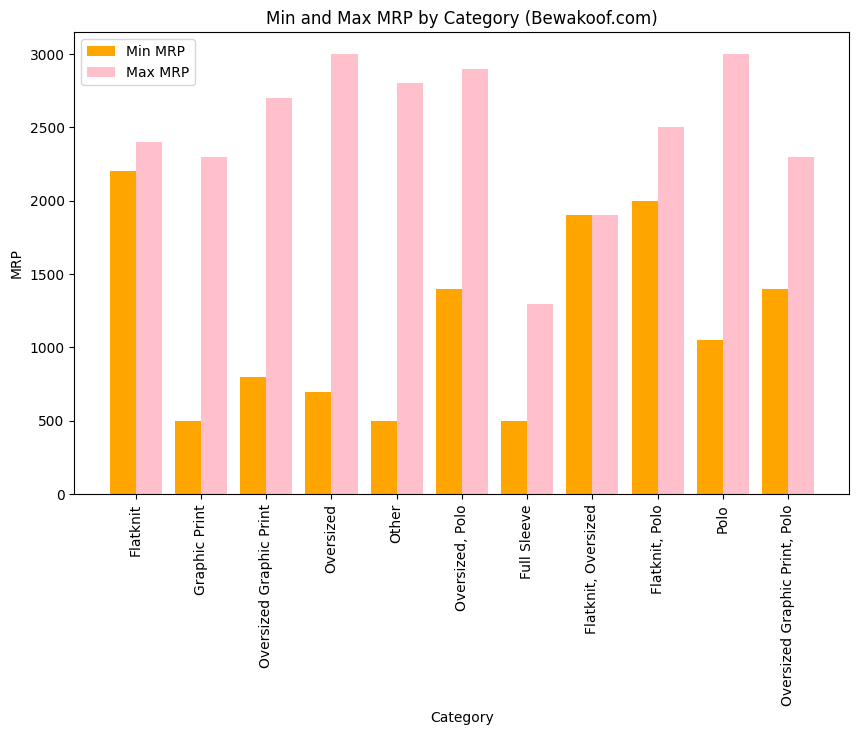

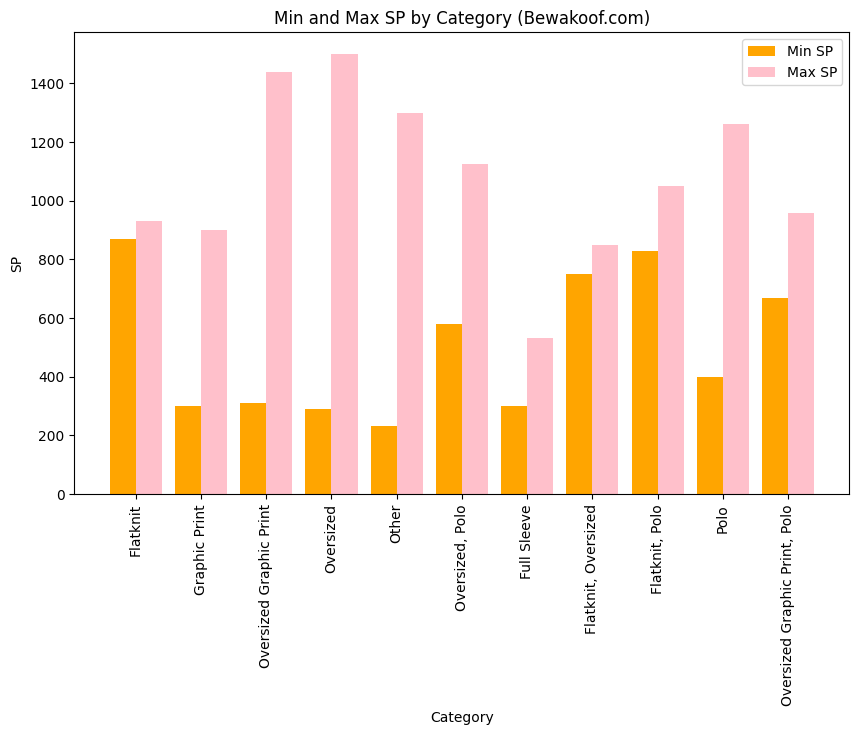

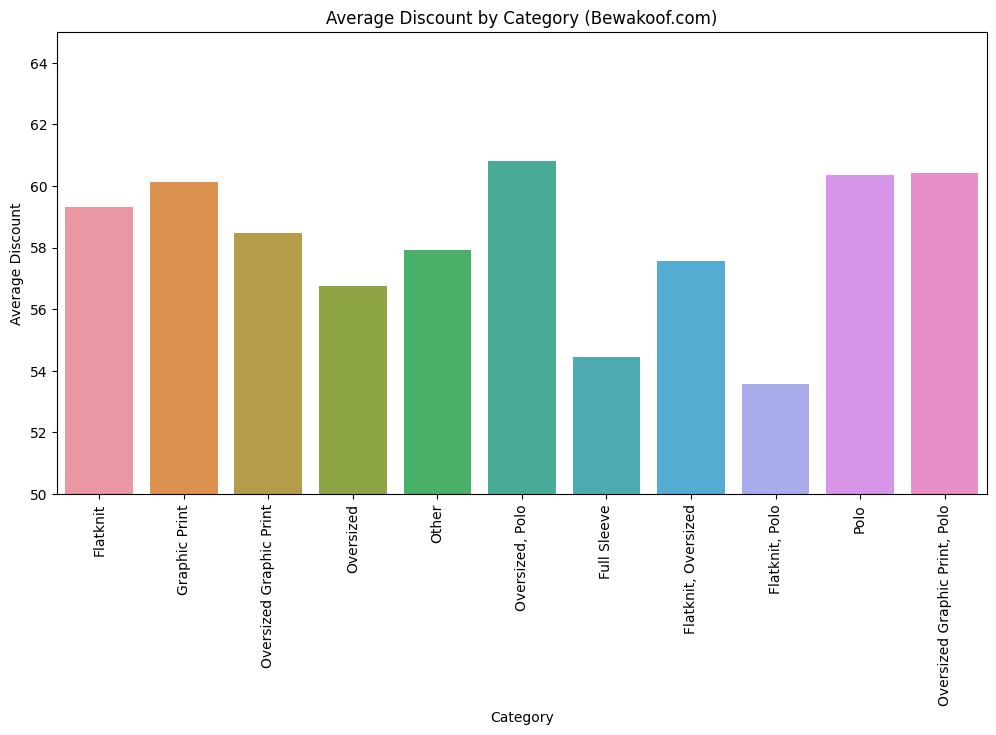

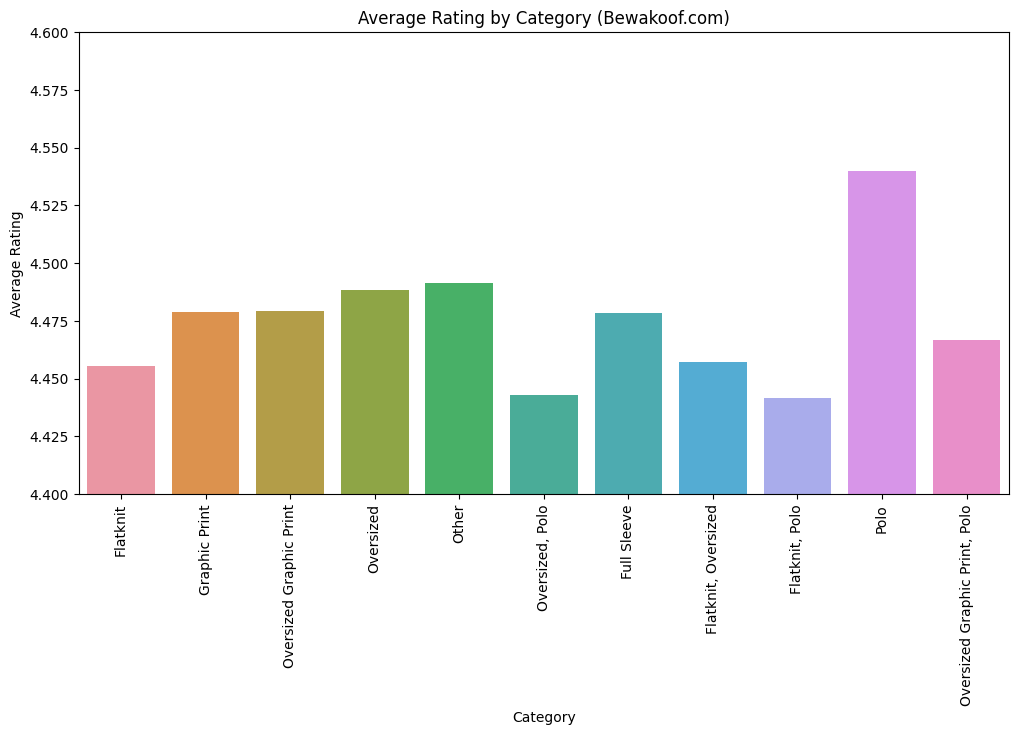

In [33]:
# for i in df['Category'].unique():
#     cat=df[df['Category']==i]
#     cols=['MRP','SP','Rating','Discount']
#     print('Info of:',i)
#     for j in cols:
        
#         print('Mean:','(',j,') ',cat[j].mean())
#         print('Max:','(',j,') ',cat[j].max())
#         print('Min:','(',j,') ',cat[j].min())

#     print('\n')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame creation
# Assuming df is already created and categorized as previously shown

# Define the columns to compute statistics on
cols = ['MRP', 'SP', 'Rating', 'Discount']

# Initialize an empty list to store category statistics
category_stats = []

# Compute mean, min, and max for each category and each column
for i in df['Category'].unique():
    cat = df[df['Category'] == i]
    stats = {
        'Category': i,
        'MRP_min': cat['MRP'].min(),
        'MRP_max': cat['MRP'].max(),
        'SP_min': cat['SP'].min(),
        'SP_max': cat['SP'].max(),
        'Discount_avg': cat['Discount'].mean(),
        'Rating_avg': cat['Rating'].mean()
    }
    category_stats.append(stats)

# Convert the list of dictionaries to a DataFrame
category_stats_df = pd.DataFrame(category_stats)

# Plot min and max MRP and SP
plt.figure(figsize=(14, 10))

# MRP
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(category_stats_df))

plt.bar(index, category_stats_df['MRP_min'], bar_width, color='orange', label='Min MRP')
plt.bar(index + bar_width, category_stats_df['MRP_max'], bar_width, color='pink', label='Max MRP')

plt.xlabel('Category')
plt.ylabel('MRP')
plt.title('Min and Max MRP by Category (Bewakoof.com)')
plt.xticks(index + bar_width / 2, category_stats_df['Category'], rotation=90)
plt.legend()
plt.show()

# SP
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(category_stats_df))

plt.bar(index, category_stats_df['SP_min'], bar_width, color='orange', label='Min SP')
plt.bar(index + bar_width, category_stats_df['SP_max'], bar_width, color='pink', label='Max SP')

plt.xlabel('Category')
plt.ylabel('SP')
plt.title('Min and Max SP by Category (Bewakoof.com)')
plt.xticks(index + bar_width / 2, category_stats_df['Category'], rotation=90)
plt.legend()
plt.show()
# plt.subplot(2, 1, 2)
# sns.barplot(x='Category', y='SP_min', data=category_stats_df, color='blue', label='Min SP')
# sns.barplot(x='Category', y='SP_max', data=category_stats_df, color='red', label='Max SP')
# plt.xticks(rotation=90)
# plt.ylabel('SP')
# plt.legend()
# plt.title('Min and Max SP by Category')

# plt.tight_layout()
# plt.show()

# Plot average discount for each category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Discount_avg', data=category_stats_df)
plt.xticks(rotation=90)
plt.ylabel('Average Discount')
plt.title('Average Discount by Category (Bewakoof.com)')
plt.ylim(50,65)
plt.show()

# Plot average rating for each category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Rating_avg', data=category_stats_df)
plt.ylim(4.4,4.6)
plt.xticks(rotation=90)
plt.ylabel('Average Rating')
plt.title('Average Rating by Category (Bewakoof.com)')
plt.show()



In [34]:
category_stats_df

,Category,MRP_min,MRP_max,SP_min,SP_max,Discount_avg,Rating_avg
0,Flatknit,2199,2399,869,929,59.333333,4.455556
1,Graphic Print,499,2299,299,899,60.118841,4.478947
2,Oversized Graphic Print,799,2699,309,1439,58.473757,4.479402
3,Oversized,699,2999,290,1499,56.748768,4.488153
4,Other,499,2799,232,1299,57.939560,4.491600
5,"Oversized, Polo",1399,2899,581,1124,60.818182,4.442857
6,Full Sleeve,499,1299,299,533,54.444444,4.478261
7,"Flatknit, Oversized",1899,1899,749,849,57.571429,4.457143
8,"Flatknit, Polo",1999,2499,829,1049,53.583333,4.441667
9,Polo,1049,2999,399,1260,60.370370,4.540000


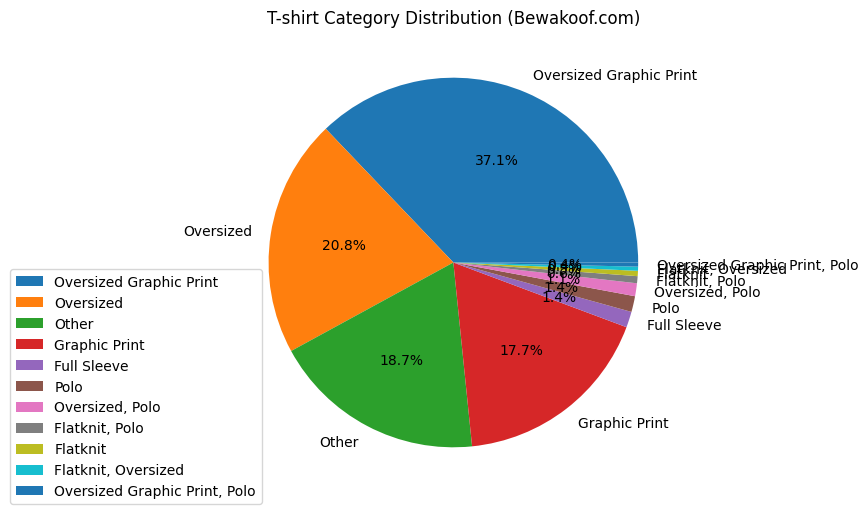

In [35]:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(16, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('T-shirt Category Distribution (Bewakoof.com)')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.5))
plt.show()


# Reviews analysis

In [36]:
df1=pd.read_csv('processed_csv/bewakoof_review.csv')
df1.head()

,name,title,desc
0,sandipan2018monda,Quite good,Reliable and secure
1,sandiptandel9532,Refund Not Received for Returned Product,I am writing to express my extreme frustration...
2,yash93411,Bewakoof stands out fashionable clothes,Bewakoof stands out as one of the leading inte...
3,raghavprakhar8,Order Delay,I placed an order for a bag through the Bewako...
4,rahultagra32,Worst shopping app,Never do shopping on bewakoof placed an order ...


In [37]:
# Positive words and phrases
positive_words = [
    "comfortable", "soft", "high quality", "fits well", "stylish", "great value", 
    "love", "perfect", "well-made", "excellent", "durable", "breathable", 
    "affordable", "vibrant", "nice", "happy", "awesome", "fantastic", "favorite", 
    "worth the price", "good fit", "exactly as described", "fast shipping", "decent", "fine",
    "well-packaged","good","great","very good"]

# Negative words and phrases
negative_words = [
    "uncomfortable", "poor quality", "too tight", "too loose", "cheap", 
    "disappointed", "faded", "returned", "not as described", "bad fit", 
    "flimsy", "rough", "itchy", "overpriced", "defective", "torn", "shrunk","fraud","pathetic" 
    "colors ran", "smells", "wrinkled", "slow shipping", "poorly packaged","bad","worse","worst","need improvement","don't buy"
]

# Neutral words and phrases
neutral_words = [
    "okay", "not bad", "not good", "average",  
    "satisfactory", "mediocre", "alright", "acceptable", "fair", "so-so", 
    "standard", "nothing special", "ordinary"]


In [38]:
def categorize_review(review):
    review=review.lower()
    positive_count = sum(word in review for word in positive_words)
    negative_count = sum(word in review for word in negative_words)
    neutral_count = sum(word in review for word in neutral_words)
    
    if positive_count > max(negative_count, neutral_count):
        return "positive"
    elif negative_count > max(positive_count, neutral_count):
        return "negative"
    else:
        return "neutral"

# Apply the function to the DataFrame
df1['sentiment'] = df1['desc'].apply(categorize_review)

# Show the DataFrame with the new sentiment column
df1.head()

,name,title,desc,sentiment
0,sandipan2018monda,Quite good,Reliable and secure,neutral
1,sandiptandel9532,Refund Not Received for Returned Product,I am writing to express my extreme frustration...,negative
2,yash93411,Bewakoof stands out fashionable clothes,Bewakoof stands out as one of the leading inte...,neutral
3,raghavprakhar8,Order Delay,I placed an order for a bag through the Bewako...,negative
4,rahultagra32,Worst shopping app,Never do shopping on bewakoof placed an order ...,negative


In [39]:
category_counts = df1['sentiment'].value_counts()
print(category_counts)

sentiment
neutral     215
positive    176
negative     91
Name: count, dtype: int64


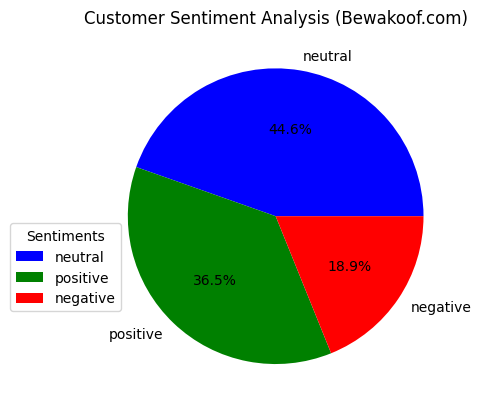

In [40]:
lab=['neutral','positive','negative']
colors = ['blue', 'green', 'red']  # Specify colors for the labels

# Create the pie chart
plt.pie(category_counts, labels=lab, autopct='%1.1f%%', colors=colors)
plt.legend(loc="upper right", bbox_to_anchor=(0.1, 0.5),title="Sentiments")
plt.title("Customer Sentiment Analysis (Bewakoof.com)")
plt.show()

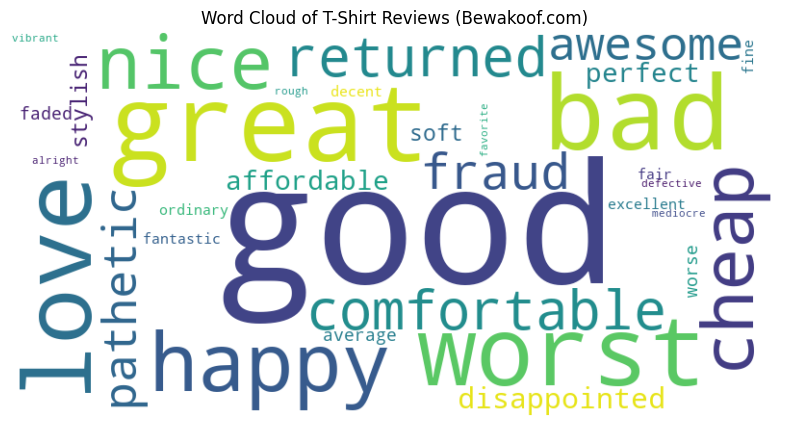

In [42]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample DataFrame creation
# Assuming df_reviews is already created and contains a column 'review_text'

# Define the word lists
positive_words = [
    "comfortable", "soft", "high quality", "fits well", "stylish", "great value", 
    "love", "perfect", "well-made", "excellent", "durable", "breathable", 
    "affordable", "vibrant", "nice", "happy", "awesome", "fantastic", "favorite", 
    "worth the price", "good fit", "exactly as described", "fast shipping", "decent", "fine",
    "well-packaged","good","great","very good"
]

negative_words = [
    "uncomfortable", "poor quality", "too tight", "too loose", "cheap", 
    "disappointed", "faded", "returned", "not as described", "bad fit", 
    "flimsy", "rough", "itchy", "overpriced", "defective", "torn", "shrunk", "fraud", "pathetic",
    "colors ran", "smells", "wrinkled", "slow shipping", "poorly packaged", "bad", "worse", "worst", 
    "need improvement", "don't buy"
]

neutral_words = [
    "okay", "not bad", "not good", "average",  
    "satisfactory", "mediocre", "alright", "acceptable", "fair", "so-so", 
    "standard", "nothing special", "ordinary"
]

# Combine all words into a single list
all_words = positive_words + negative_words + neutral_words

# Function to count the occurrences of each word in the reviews
def count_words(reviews, words_list):
    words_count = Counter()
    for review in reviews:
        for word in words_list:
            words_count[word] += review.lower().split().count(word)
    return words_count

# Count the words in the reviews
reviews = df1['desc'].tolist()
words_count = count_words(reviews, all_words)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_count)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of T-Shirt Reviews (Bewakoof.com)')
plt.show()
